In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve

Während unserer Studie über Machine Learning und insbesondere über lineare Regression haben wir festgestellt, dass die Daten nicht immer einem linearen Modell folgen, so dass wir eine lineare Regression anwenden können, um bestimmte Vorhersagen zu treffen. Ein schlecht gewähltes Modell für ein bestimmtes Dataset führt also immer zu falschen Vorhersagen, selbst wenn wir das Modell optimieren.
Aus diesem Grund werden wir in diesem Projekt kein lineares Regressionsmodell verwenden, sondern eine logistische Regression, da wir Klassifizierungen vornehmen werden und das Ziel dieses Projekts darin besteht, herauszufinden, ob die Zahl 9 zur Klasse 1 (positiv) oder zur Klasse 0 (negativ) gehört. Mit Hilfe dieses Modells (logistische Regression) aus der sklearn-Bibliothek und anderen Bibliotheken werden wir Ihnen am Ende das Ergebnis mitteilen.

Importierung und Bearbeitung der Daten
===============================


In [3]:
digits = load_digits()
digits_df = pd.DataFrame(digits.data, columns = digits.feature_names)
digits_df["Ziffern"] = digits.target
digits_df.head()
digits_df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Ziffern      0
Length: 65, dtype: int64

Wir stellen fest, dass es keine fehlenden Daten für jedes Feature gibt. Als nächstes visualisieren wir erschiedene Ziffern. Davor teilen wir den Datenset in 80% für Trainingsdaten et 20% für Testdaten.

In [4]:
X = digits.data
y = digits.target
print(X)
print(X.shape)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
(1797,)


<Figure size 1440x288 with 0 Axes>

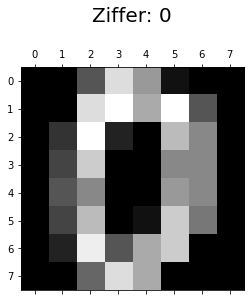

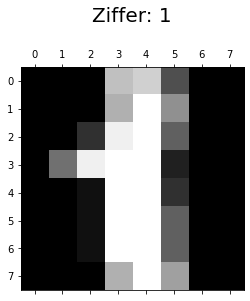

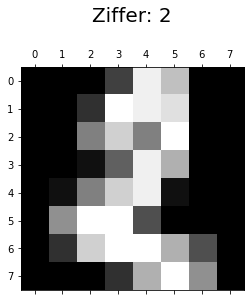

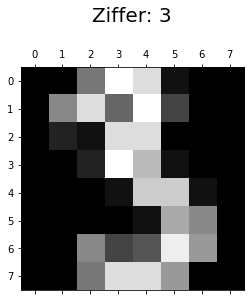

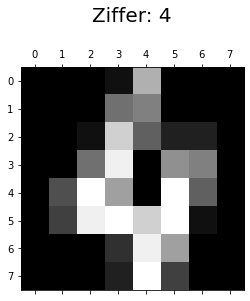

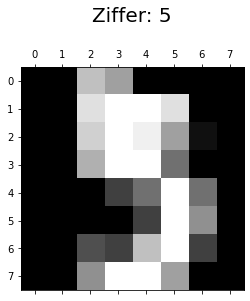

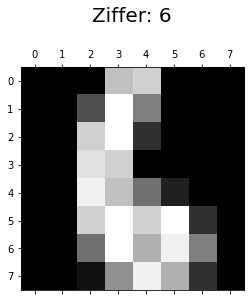

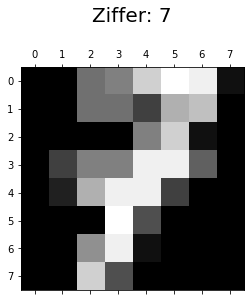

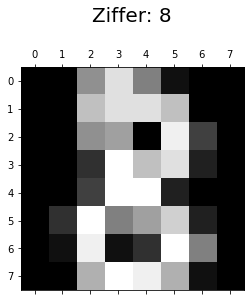

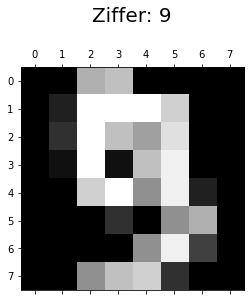

In [5]:
plt.figure(figsize=(20,4))
plt.gray()
for i in range(10):
    digit_image = X[i].reshape(8,8)
    plt.matshow(digit_image)
    plt.title('Ziffer: %i\n' % i, fontsize = 20) 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_9 = (y_train == 9).astype( np.int )
y_test_9 = (y_test == 9).astype( np.int )
print(y_train_9)

[0 0 0 ... 0 0 0]


C:\Users\Steve\AppData\Local\Temp\ipykernel_29532\1377911840.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_9 = (y_train == 9).astype( np.int )
C:\Users\Steve\AppData\Local\Temp\ipykernel_29532\1377911840.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [7]:
log_regression = LogisticRegression() # Logistic Regression
log_regression.fit(x_train, y_train_9)
test_prediction = log_regression.predict(x_test)


confusion_M =confusion_matrix(test_prediction, y_test_9)
print(confusion_M)
print(f"die Genauigkeit: {accuracy_score(y_test_9, test_prediction)}")
print(f"Precision: {precision_score(y_test_9, test_prediction, average = None)}")
print(f"Recall: {recall_score(y_test_9, test_prediction, average = None)}")
print(classification_report(y_test_9, test_prediction))
 


[[315   6]
 [  5  34]]
die Genauigkeit: 0.9694444444444444
Precision: [0.98130841 0.87179487]
Recall: [0.984375 0.85    ]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.87      0.85      0.86        40

    accuracy                           0.97       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.97      0.97      0.97       360



c:\Users\Steve\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimisierung des Modells durch Skalierung, polynomialen Features
und verwenden Sie Kreuzvalidierung zur Auswertun

In [ ]:
pipeline = Pipeline([('poly', PolynomialFeatures(include_bias=False)),('reg',LogisticRegression())])
parameters = {'poly__degree': np.arange(1,4), 'reg__alpha': np.logspace(-6,0,51)}
pipeline.fit(x_train, y_train_9)
grid_pipeline = GridSearchCV(pipeline, parameters)
score = cross_val_score(pipeline, x_train, y_train_9, cv=5, scoring="accuracy")


In [13]:
y_pred = pipeline.predict(x_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
pipeline.score(x_test, y_test_9)

0.9972222222222222

In [17]:
confusion_M =confusion_matrix(pipeline.predict(x_test), y_test_9)
print(confusion_M)
print(f"die Genauigkeit: {accuracy_score(y_test_9, pipeline.predict(x_test))}")
print(f"Precision: {precision_score(y_test_9, pipeline.predict(x_test), average = None)}")
print(f"Recall: {recall_score(y_test_9, pipeline.predict(x_test), average = None)}")
print(classification_report(y_test_9, pipeline.predict(x_test)))

[[320   1]
 [  0  39]]
die Genauigkeit: 0.9972222222222222
Precision: [0.99688474 1.        ]
Recall: [1.    0.975]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      0.97      0.99        40

    accuracy                           1.00       360
   macro avg       1.00      0.99      0.99       360
weighted avg       1.00      1.00      1.00       360



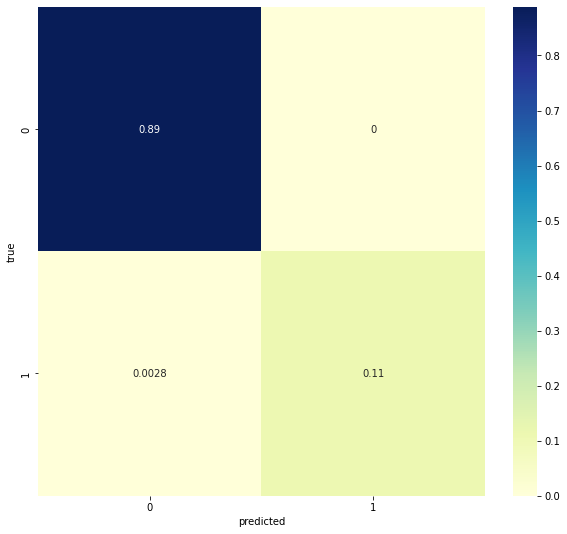

In [15]:
confusion_M = confusion_matrix(y_test_9, pipeline.predict(x_test), normalize='all')
fig = plt.figure(figsize=(10, 9))
sns.heatmap(confusion_M, cmap='YlGnBu', annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

### Visualisierung falsch klassifizierte Ziffern

predict: 0

true: 9


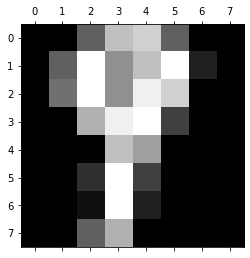

In [16]:
mask = y_test_9 != y_pred
for i, x in enumerate(x_test):
    image = x.reshape(8,8)
    if mask[i]:
        print(f'predict: {int(y_pred[i])}\n\ntrue: {y_test[i]}')
        plt.matshow(image)
        plt.show()

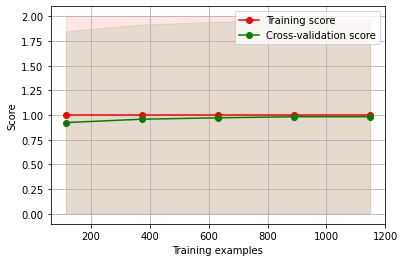

In [19]:

train_sizes, train_scores, test_scores = learning_curve(
    pipeline,
    x_train,
    y_train,
    cv=5,
    n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.mean(test_scores, axis=1)

plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r"
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g"
)
plt.plot(
    train_sizes,
    train_scores_mean,
    'o-',
    color="r",
    label="Training score"
)
plt.plot(
    train_sizes,
    test_scores_mean,
    'o-',
    color="g",
    label="Cross-validation score"
)
plt.legend(loc="best")
plt.show()